In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def partition(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        for y in partition(number - x):
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def all_partitions_below(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        partition_lower = all_partitions_below(number - x)
        answer = answer.union(partition_lower)
        for y in partition_lower:
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def non_trivial_partitions(n):
    all_partitions = all_partitions_below(n)
    for i in range(1, n + 1):
        all_partitions.remove((i,))
        pn = sorted(list(all_partitions), key=lambda part: np.sum(part))
    return pn

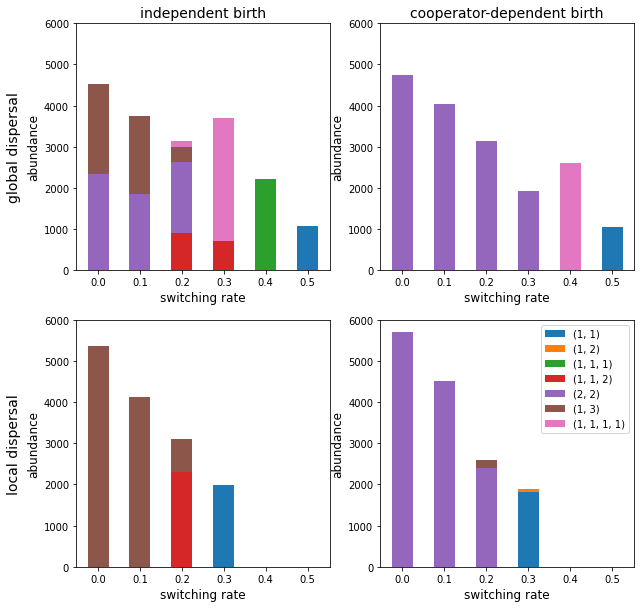

In [15]:
T = 5000
M = 100
n = 4
b=0.3
ass = [0,1]
d=0.03
r=2
s=1
ms = [0,0.1,0.2,0.3,0.4,0.5]
localss = [False,True]
reps = range(10)

modes = non_trivial_partitions(n)
nmodes = len(modes)

fig, axs = plt.subplots(2,2, figsize=(10,10))

for a in ass:
    for local in localss:

        mcounts = []
        for m in ms:
            counts = []
            for rep in reps:
                _,mos,_ = np.load('data/sim_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(T,M,n,b,a,d,r,s,m,m,local,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        
        bottom = np.zeros(len(ms))
        ax = axs[1 if local else 0,a]
        for i in range(nmodes):
            ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i])
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate', fontsize=12)
        ax.set_ylabel('abundance', fontsize=12)
        ax.set_ylim(0,6000)
    
        if not local:
            if a==0:
                ax.set_title('independent birth', fontsize=14)
            else:
                ax.set_title('cooperator-dependent birth', fontsize=14)
        if a==0:
            if not local:
                ax.text(-0.2, 3000, 'global dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(-0.2, 3000, 'local dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')

plt.legend()
plt.savefig('plots/fig4_n%d.jpg' %n)
plt.show()

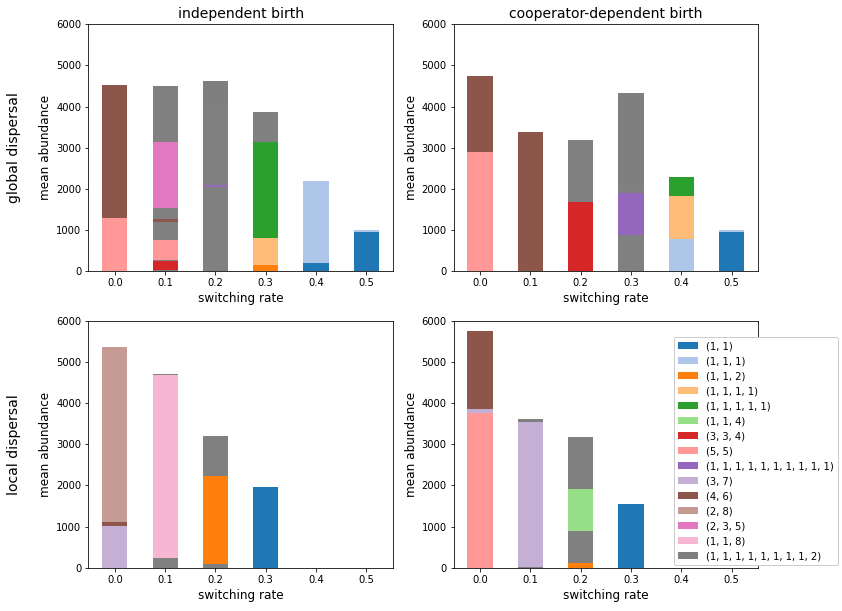

In [13]:
T = 5000
M = 100
n = 10
b=0.3
ass = [0,1]
d=0.03
r=2
s=1
ms = [0,0.1,0.2,0.3,0.4,0.5]
localss = [False,True]
reps = range(10)

modes = non_trivial_partitions(n)
nmodes = len(modes)

all_mcounts=[]
for a in ass:
    for local in localss:

        mcounts = []
        for m in ms:
            counts = []
            for rep in reps:
                _,mos,_ = np.load('data/sim_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(T,M,n,b,a,d,r,s,m,m,local,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        all_mcounts.append(mcounts)
all_mcounts=np.array(all_mcounts)

ixs = []
for mcounts in all_mcounts:
    for i in range(nmodes):
        if i in ixs:
            pass
        elif np.max(mcounts[:,i+1])>1000:
            ixs.append(i)

fig, axs = plt.subplots(2,2, figsize=(12,10))

k = 0
for a in ass:
    for local in localss:
        
        bottom = np.zeros(len(ms))
        mcounts = all_mcounts[k]
        k += 1
        ax = axs[1 if local else 0,a]
        j = 0
        for i in range(nmodes):
            if i in ixs:
                ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i], color=mpl.cm.tab20(j))                 
                j += 1
            else:
                ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, color='gray')
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate', fontsize=12)
        ax.set_ylabel('mean abundance', fontsize=12)
#         ax.set_title('a=%d, globall=%d' %(a,globall))
        if not local:
            if a==0:
                ax.set_title('independent birth', fontsize=14)
            else:
                ax.set_title('cooperator-dependent birth', fontsize=14)
        if a==0:
            if not local:
                ax.text(-0.2, 3000, 'global dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(-0.2, 3000, 'local dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
        ax.set_ylim(0,6000)
#         ax.legend()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.8,0.075), fancybox=True, framealpha=1)
plt.savefig('plots/fig4_n%d.jpg' %n)
plt.show()